In [1]:
!pip install -q pycaret

In [2]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data

In [3]:
dataset = get_data('pycaret_downloads')
target = 'Total'

,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


In [4]:
import pandas as pd
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', drop=True, inplace=True)
dataset.head()

,Total
Date,
2021-07-08,3773
2021-07-09,3172
2021-07-10,2079
2021-07-11,2725
2021-07-12,4542


In [5]:
figure_kwargs = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

folds = 3
fh = 10

In [6]:
from pycaret.time_series import *
ts_exp = TSForecastingExperiment()
ts_exp.setup(dataset, fh=fh, fig_kwargs=figure_kwargs)

,Description,Value
0,session_id,3384
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(80, 1)"
7,Transformed test set shape,"(10, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


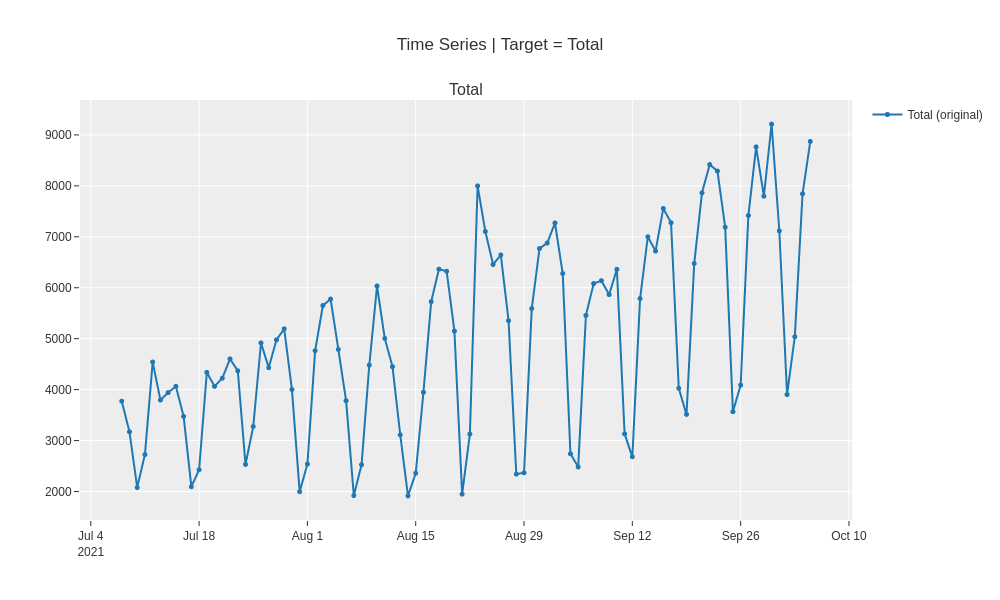

In [7]:
ts_exp.plot_model()

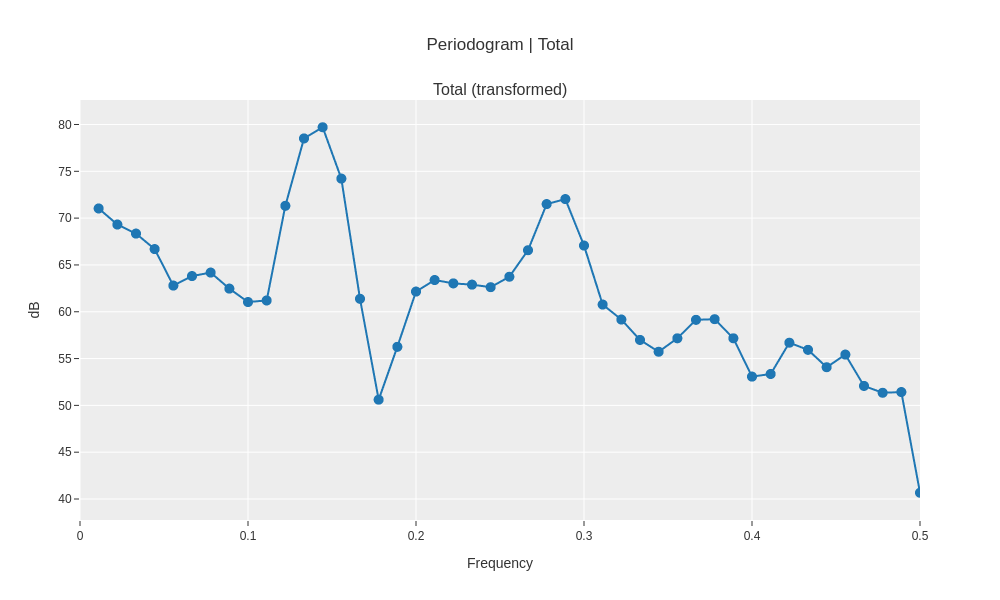

In [8]:
ts_exp.plot_model(plot="periodogram")

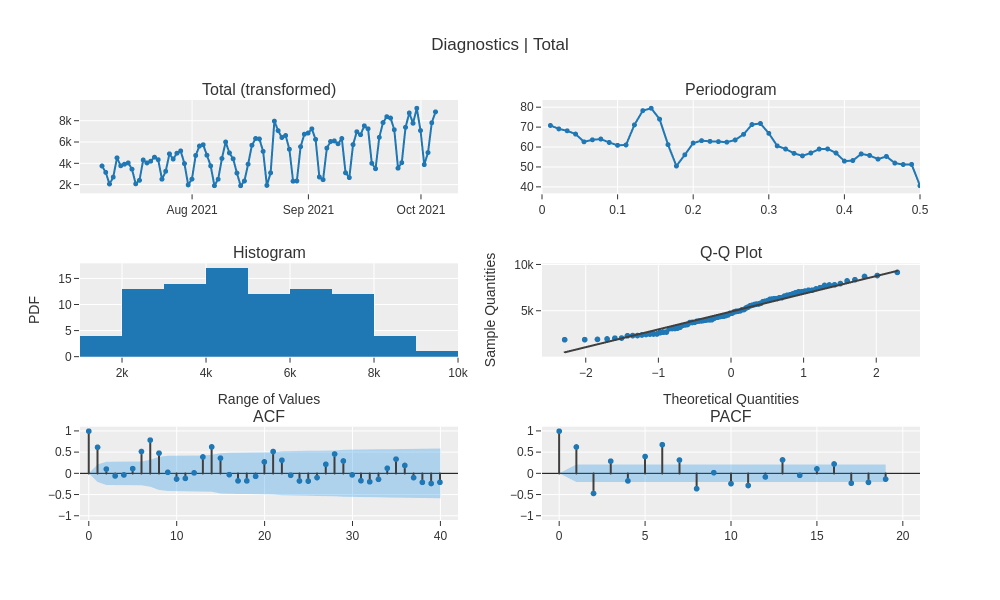

In [9]:
ts_exp.plot_model(plot="diagnostics")

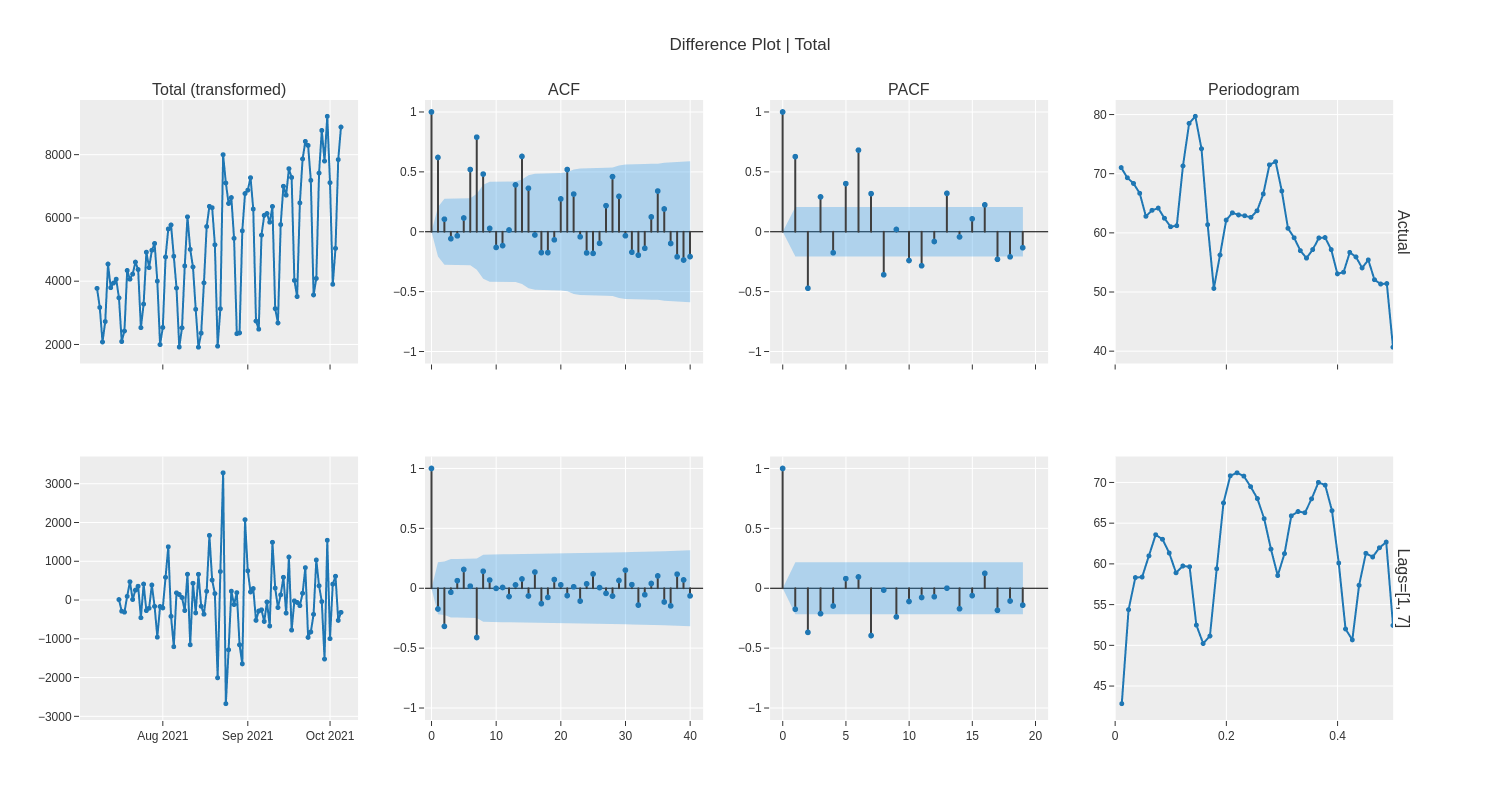

In [10]:
ts_exp.plot_model(
    plot="diff",
    data_kwargs={"lags_list": [[1, 7]], "acf": True, "pacf": True, "periodogram": True},
    fig_kwargs={"height": 800, "width": 1500}
)

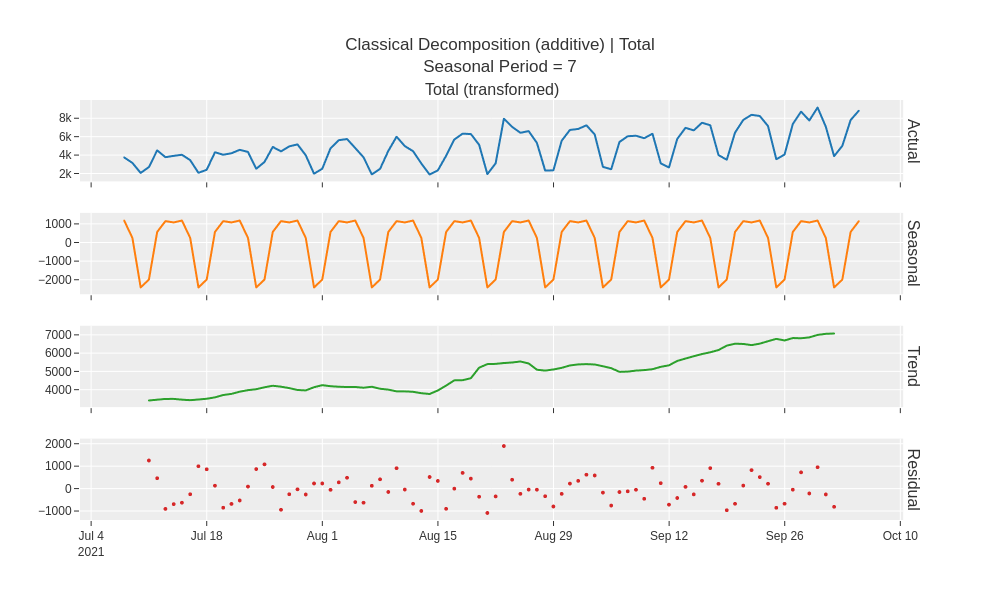

In [11]:
ts_exp.plot_model(plot="decomp")

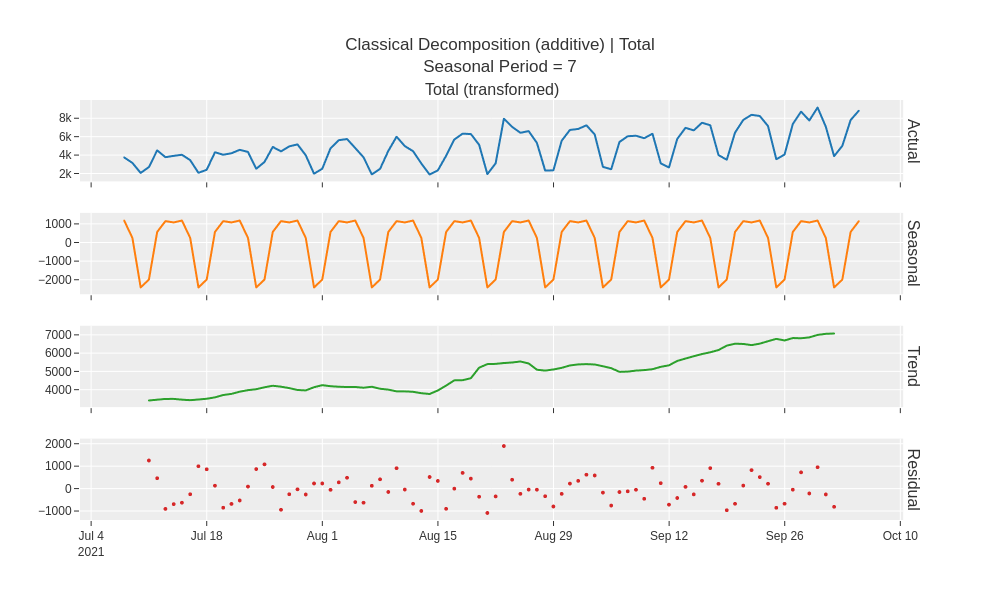

In [12]:
ts_exp.plot_model(plot="decomp", data_kwargs={"period": 14})

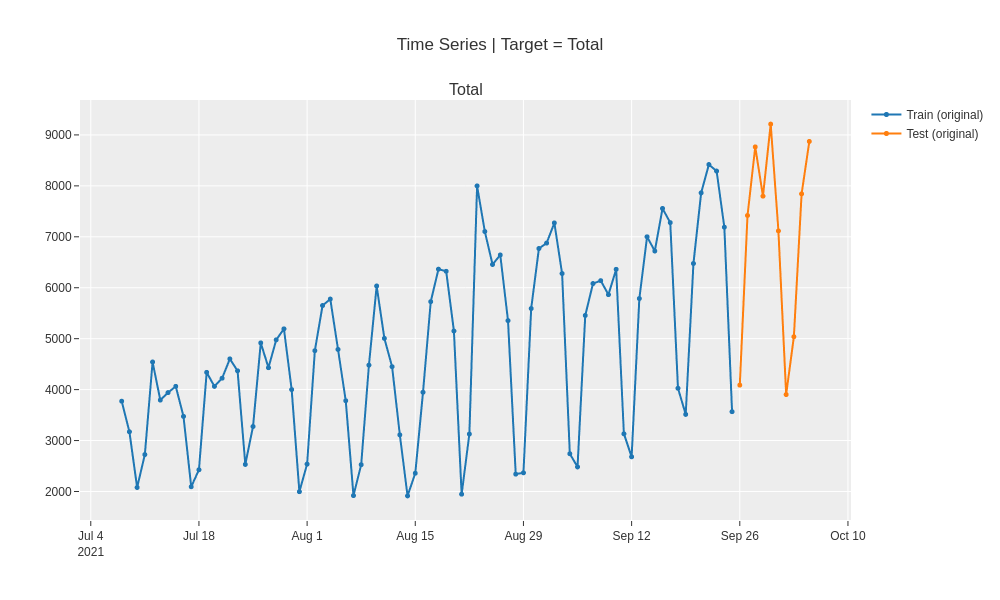

In [13]:
ts_exp.plot_model(plot="train_test_split")

In [14]:
ts_exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,90.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,4960.366667
3,Summary,Statistics,Transformed,Median,,4776.5
4,Summary,Statistics,Transformed,Standard Deviation,,1939.000116
5,Summary,Statistics,Transformed,Variance,,3759721.448315
6,Summary,Statistics,Transformed,Kurtosis,,-0.920113
7,Summary,Statistics,Transformed,Skewness,,0.22622
8,Summary,Statistics,Transformed,# Distinct Values,,89.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",293.08932


In [15]:
ts_exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [16]:
ts_exp.setup(dataset, fh=fh, fold=folds, fig_kwargs=figure_kwargs)

,Description,Value
0,session_id,6811
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(80, 1)"
7,Transformed test set shape,"(10, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [17]:
model = ts_exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9820,0.7883,607.3310,724.0625,0.1250,0.1212,0.8204,0.5133
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.0170,0.7898,628.7719,725.9918,0.1288,0.1228,0.8248,0.7800
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.0656,0.8509,658.8642,781.4941,0.1391,0.1303,0.7972,0.4500
auto_arima,Auto ARIMA,1.0845,0.8784,671.3400,807.0448,0.1342,0.1256,0.7632,3.0267
arima,ARIMA,1.0990,0.9924,679.1848,910.9267,0.1306,0.1228,0.7256,0.2067
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.1347,0.9120,701.0613,835.6798,0.1494,0.1387,0.7699,0.8433
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.1386,0.9193,703.2317,842.4456,0.1557,0.1437,0.7667,0.3533
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.1444,0.9190,708.3643,846.3072,0.1692,0.1472,0.7471,0.7300
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.1449,0.8909,707.7388,818.1750,0.1504,0.1403,0.7798,0.7467
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.1810,0.9280,729.6806,850.9553,0.1614,0.1473,0.7636,0.3600


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [18]:
prediction = ts_exp.predict_model(model)
prediction.head()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,XGBRegressor,0.6754,0.6011,439.4185,546.5049,0.0587,0.0601,0.9146


,y_pred
2021-09-26,4160.3842
2021-09-27,7116.9756
2021-09-28,8152.6744
2021-09-29,8523.3940
2021-09-30,8076.7292


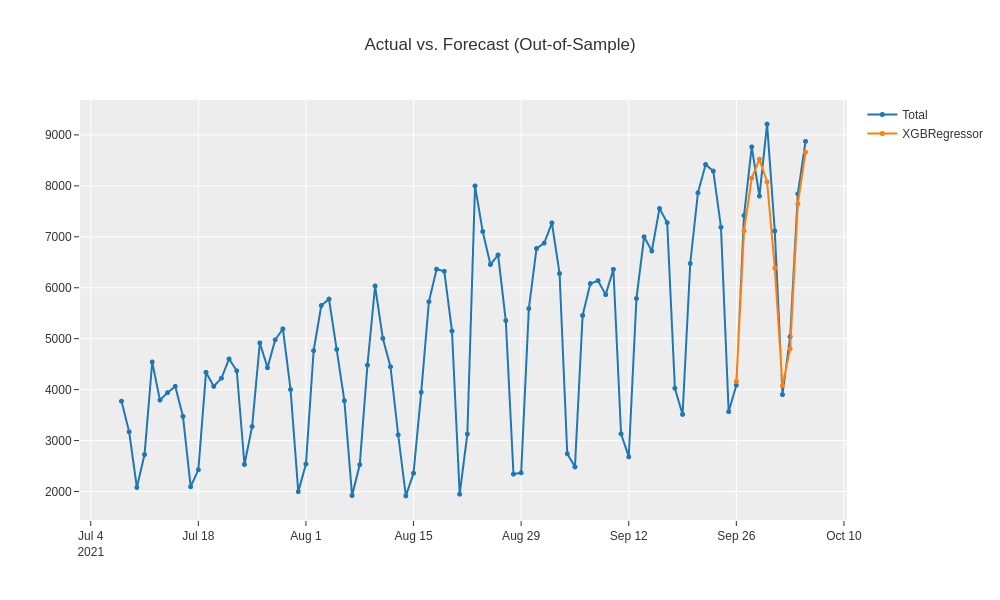

In [19]:
ts_exp.plot_model(model, plot="forecast")

In [20]:
prediction

,y_pred
2021-09-26,4160.3842
2021-09-27,7116.9756
2021-09-28,8152.6744
2021-09-29,8523.3940
2021-09-30,8076.7292
2021-10-01,6386.1697
2021-10-02,4077.5584
2021-10-03,4802.2341
2021-10-04,7645.8394
2021-10-05,8660.5292


In [21]:
auto_arima = ts_exp.create_model("auto_arima")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-26,1.0004,0.8481,618.1759,792.0253,0.1722,0.1491,0.8392
1,2021-09-05,1.1499,0.8982,719.4257,834.7882,0.1291,0.1192,0.6332
2,2021-09-15,1.1031,0.8890,676.4184,794.3209,0.1014,0.1084,0.8172
Mean,NaT,1.0845,0.8784,671.3400,807.0448,0.1342,0.1256,0.7632
SD,NaT,0.0624,0.0218,41.4907,19.6399,0.0291,0.0172,0.0923


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
prediction_auto_arima = ts_exp.predict_model(auto_arima)
prediction_auto_arima.head()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,1.0161,0.7907,661.0891,718.8210,0.0990,0.1049,0.8522


,y_pred
2021-09-26,3491.6264
2021-09-27,6750.2948
2021-09-28,7883.9955
2021-09-29,8067.0368
2021-09-30,8203.4378


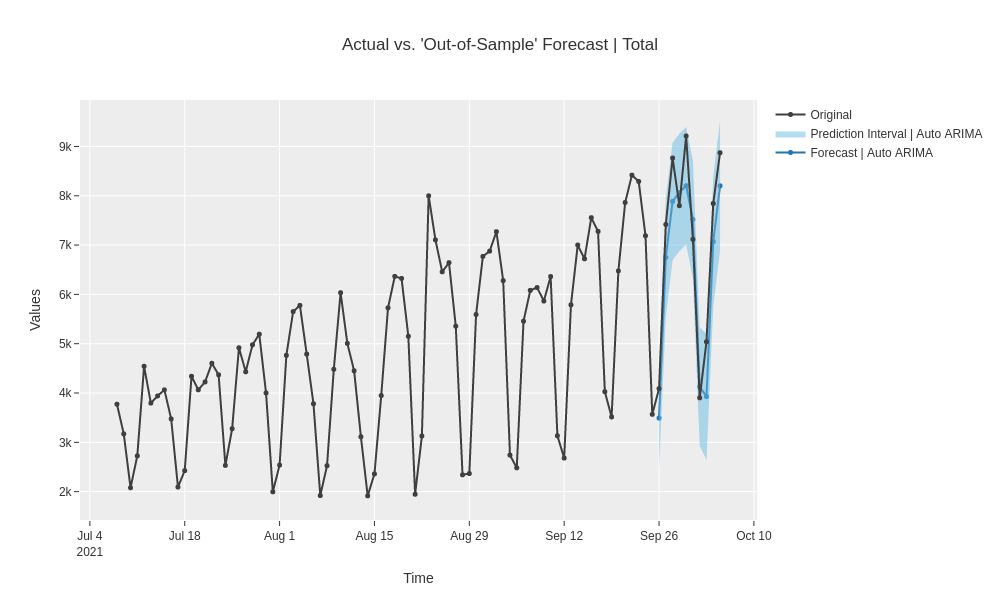

In [23]:
ts_exp.plot_model(auto_arima, plot="forecast")

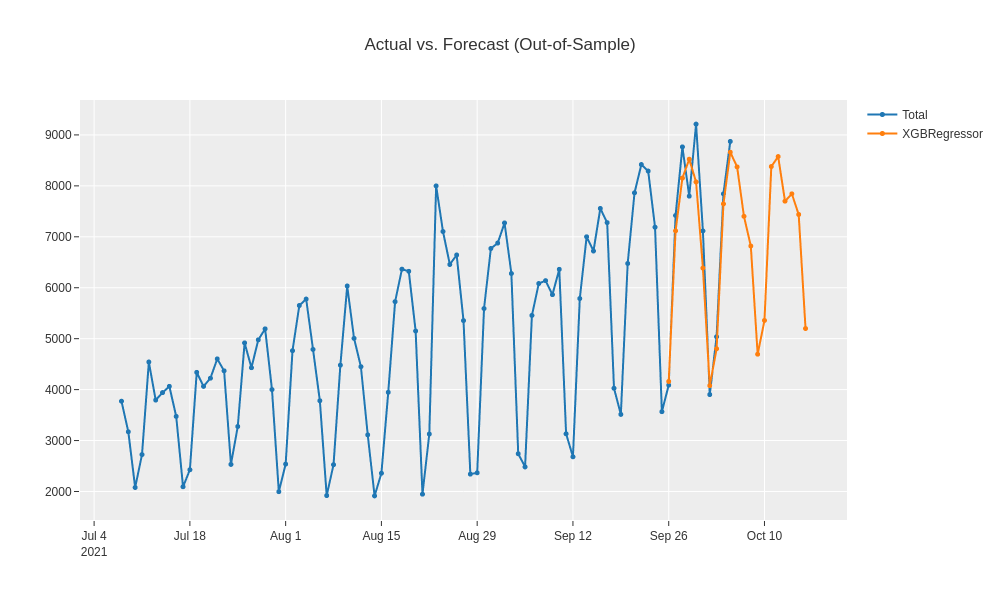

In [30]:
ts_exp.plot_model(estimator=model, data_kwargs={'fh': 21})

In [31]:
best_models = ts_exp.compare_models(n_select=3)
best_models

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9820,0.7883,607.3310,724.0625,0.1250,0.1212,0.8204,0.5567
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.0170,0.7898,628.7719,725.9918,0.1288,0.1228,0.8248,0.4200
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.0656,0.8509,658.8642,781.4941,0.1391,0.1303,0.7972,0.7533
auto_arima,Auto ARIMA,1.0845,0.8784,671.3400,807.0448,0.1342,0.1256,0.7632,3.2033
arima,ARIMA,1.0990,0.9924,679.1848,910.9267,0.1306,0.1228,0.7256,0.1033
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.1347,0.9120,701.0613,835.6798,0.1494,0.1387,0.7699,0.4900
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.1386,0.9193,703.2317,842.4456,0.1557,0.1437,0.7667,0.5500
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.1444,0.9190,708.3643,846.3072,0.1692,0.1472,0.7471,1.3067
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.1449,0.8909,707.7388,818.1750,0.1504,0.1403,0.7798,0.7033
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.1810,0.9280,729.6806,850.9553,0.1614,0.1473,0.7636,0.3600


Processing:   0%|          | 0/119 [00:00<?, ?it/s]

[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                         4, 3, 2,
                                                                         1]},
                                                    n_jobs=1)],
                     regressor=XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gr...rtance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators

In [36]:
metrics = ts_exp.pull()
top_model_metrics = metrics.iloc[0:3]['MAE']
top_model_weights = 1 - top_model_metrics/top_model_metrics.sum()
display(top_model_weights)

,MAE
0,0.744305
1,0.632953
2,0.622742


In [37]:
blended_models = ts_exp.blend_models(best_models, method='mean', weights=top_model_weights.values.tolist())

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-26,1.1234,0.9064,694.1403,846.4790,0.1885,0.1671,0.8163
1,2021-09-05,0.8421,0.6334,526.8618,588.6749,0.1018,0.0984,0.8176
2,2021-09-15,1.0918,0.8282,669.4854,739.9689,0.1015,0.1077,0.8413
Mean,NaT,1.0191,0.7893,630.1625,725.0409,0.1306,0.1244,0.8251
SD,NaT,0.1258,0.1148,73.7348,105.7761,0.0410,0.0304,0.0115


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,0.8439,0.7119,549.0545,647.1711,0.0732,0.0763,0.8802


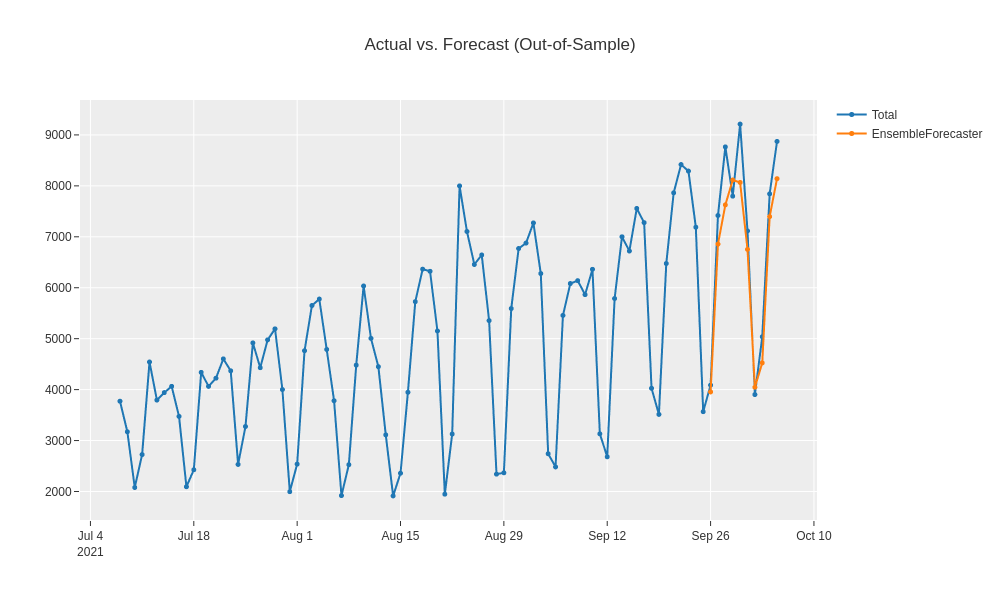

In [38]:
predict_blended = ts_exp.predict_model(blended_models)
ts_exp.plot_model(blended_models)